From online social networks such as Facebook and Twitter to transportation networks such as bike sharing systems, networks are everywhere, and knowing how to analyze this type of data will open up a new world of possibilities for you as a Data Scientist. This course will equip you with the skills to analyze, visualize, and make sense of networks. You'll apply the concepts you learn to real-world network data using the powerful NetworkX library. With the knowledge gained in this course, you'll develop your network thinking skills and be able to start looking at your data with a fresh perspective!

- the basik of network and network analysis
- how to find important nodes.
- how to identify communities of nodes 
- algorithm for finding paths
.... 
- model, analyze, visualize networks data
- case study application

Network Analysis in Python (Part 1)

Network Analysis in Python (Part 2)

# 1 Introduction to networks :

http://konect.uni-koblenz.de/

networks are useful for modelling relationships between entities, by modeling data as a network we can gain insights into what entities (nodes) are important. 

insights on : 

- important entities (nodes), ex : influences in social network
- pathfinding : ex most efficient path in transporation network
- clustering : find communities in the network


### Network structure : 

Network structure is described by 2 sets of itmes : nodes and edges(line connecting nodes). 

nodes : neuron.
egdes : links two nodes/ neuron.

nodes and egdes can have metadata associated with them. 

**NetworkX** is a library that allows us to manipulate analyze and model graph data.


### NetworkX API : analyzing graph data in memory 

### Queries on a graph. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# initializing empty gragh 
graph = nx.Graph()

######################
### NODES : 
#adding nodes 1,2,3 :
graph.add_nodes_from([1,2,3])

#see what nodes are in the graph
print('Nodes in the network',graph.node())

# size of the gragh/network (number of nodes in a notwork)
print('The size of the network is :',len(graph.nodes()))

# storing meta data in the nodes:
graph.node[1]['Color']= 'blue'

# retrive the node list metadata:
print('\nThe list of metadata in the nodes',graph.nodes(data=True))

######################
### EDGES : 

#adding egde btw node1 and node 2 : 
graph.add_edge(2,3)
graph.add_edge(1,3)

#see where the egdes is : the nodes where the node starts and ends 
print('\nEgdes in the network in between connecting nodes:',graph.edges())

# storing meta data in the edges:
graph.edges[(1, 3)]['Number'] = 'node_1_3'

# retrive the egde list metadata of the network:
print('The list of metadata in the egdes',graph.edges(data=True))

# accessing the list metadata of a specific egde :
print('the list of metadata in a specific egde',list(graph.edges(data=True))[0])

# basic drawing functionality: node-link-diagram rendering of the graph
nx.draw(graph, with_labels=True)
plt.show()

Nodes in the network [1, 2, 3]
The size of the network is : 3

The list of metadata in the nodes [(1, {'Color': 'blue'}), (2, {}), (3, {})]

Egdes in the network in between connecting nodes: [(1, 3), (2, 3)]
The list of metadata in the egdes [(1, 3, {'Number': 'node_1_3'}), (2, 3, {})]
the list of metadata in a specific egde (1, 3, {'Number': 'node_1_3'})


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

# 1.2 Types of graphs:

- Undirected graphs (social graphs, ex Facebook) : they are named Undirected graph because they are compromised of edges that don't have any inherent dicrectly associated with them. They have the type graph. Two frinds represent nodes, and the connectivity is the egdes(the egdes don't have an arrow)
G= nx.Graph()

- Directed network (ex Twitter) : there is an inherent dicrectly associated with them, this is because of the nature of how the user interacte with each other . a userA(nodes) may follow(edge with an arrow towards userB) userB. But userB may not follow back userA.
D = nx.DiGraph()

- Multi DiGraph (trips recordes btw bikes sharing stations): graph that has multiple egdes btw nodes. Stations(nodes), trips(egdes). it's memory-intensive to model multiple egdes per pair of nodes. so we may choose to collapse the egdes into a single egde that contains metadata summary of the original.
M= nx.MultiGraph

ex : collapsing multi Digraph with 3 egdes into one edges, by giving it a metadata with value of 3 indicating that there was orriginaly 3 egdes btw the pair of nodes.

- Self-loops : it can be used in a certain scenarios such as bikes sharing data, where a trip(edge) begins at a station(node) and finishes at the sames stations(node)

#### Weights indicate the "strength" of an edge


In [2]:
# Specifying a weight on edges : example

# # Set the weight of the edge
# Graph.edges[node1, node10]['wight'] = 2

# # Iterate over all the edges (with metadata)
# for u, v, d in graph.edges(data= True):

#     # Check if node 293 is involved
#     if 293 in [u,v]:

#         # Set the weight to 1.1
#         T.edges[u, v]['weight'] = 1.1

In [3]:
# retreiving the number of sef-loops:
graph.number_of_selfloops()

# example of retreiving self loops nodes :

# # Define find_selfloop_nodes()
# def find_selfloop_nodes(graph):
#     """
#     Finds all nodes that have self-loops in the graph G.
#     """
#     nodes_in_selfloops = []

#     # Iterate over all the edges of graph : begin and ends at the same node
#     for u, v in G.edges():

#     # Check if node u and node v are the same
#         if u == v:

#             # Append node u to nodes_in_selfloops
#             nodes_in_selfloops.append(u)

#     return nodes_in_selfloops

# # Check whether number of self loops equals the number of nodes in self loops
# assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

0

## 1.4 : Network visualization

### rational vs irrational vizualisation : 

Visualizing a network using : 

- **Matrix plot**: in a matrix plot, nodes are the rows and columns of a matrix and cells are filled in according to weather an edge exists btw the pair of nodes.   
**In an undirected graph(no arrow egdes), the matrix is symmetrical around the diagonal. and egde(A, B) = edge(B,A).**
**in a directed graph, the matrix is not necessarly symmetrical. only bidirectional edges can be equal egde(A, B) = edge(B,A).**
**if the nodes are ordered along the rows and columns such that neighbors are listed close to one another, then a matrix plot can be used to visualize cluster or communities of nodes.**.

A = nx.to_numpy_matrix(graph) :Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost.  

nx.from_numpy_matrix(A) :  allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (nx.from_numpy_matrix(A, create_using=nx.DiGraph)).




- **Arc plot**: is a transformation of node-link-diagram layout, in which nodes are ordered along one axis of the plot, and egde are draw using circular arcs from one node to another. if nodes are ordered according to some sortable rule (ex : nodes are grouped by location), then it will be possible to visualize the relationship between connectivity and the sorted(grouped) property. 
Arc plot are a good start for visualizing a network, as it forms the basis of other plots.





- **Circos plot**: is the transformation of the Arc plot such as the two ends of the Arc plot are joined togther into a circle. (the nodes are orded like arcplot but along one axis, they are orded in a from of circle and then connected by the edges inside the circle.)
Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network


links :

fb : https://github.com/openp2pdesign/Facebook-Social-Network-Analysis
github : https://github.com/openp2pdesign/Github-Social-Network-Analysis
twitter : https://github.com/openp2pdesign/Twitter-Social-Network-Analysis
linkedin : https://github.com/openp2pdesign/Linkedin-Social-Network-Analysis
fb : https://github.com/openp2pdesign/Facebook-Social-Network-Analysis
twitter : https://github.com/openp2pdesign/Twitter-Lists-SNA-EgoNetworks

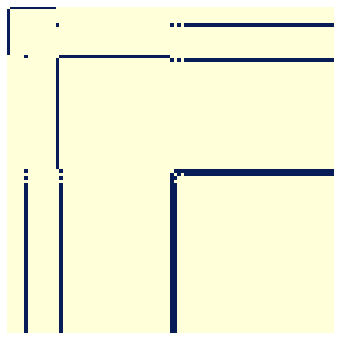

In [4]:
##  Example of visualizing a network as a Matrix


########################
#Using nxviz

twitter_g = nx.read_adjlist("ego-twitter.n3")

# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(twitter_g)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# ##########################
# # Using nx to see to verify that metadata field is lost after converting

# # Convert T to a matrix format: A
# A = nx.to_numpy_matrix(T)

# # Convert A back to the NetworkX form as a directed graph: T_conv
# T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# # Check that the `category` metadata field is lost from each node
# for n, d in T_conv.nodes(data=True):
#     assert 'category' not in d.keys()


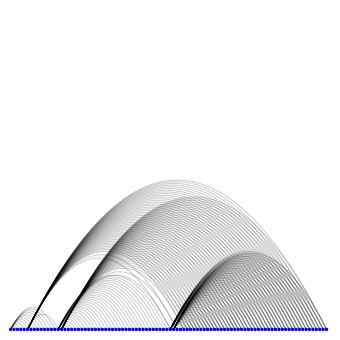

In [5]:
###  Example of visualizing a network as an Arc Plot
import nxviz as nv
arc = nv.ArcPlot(twitter_g)
arc.draw()
plt.show()

## order and color by column
# nv.ArcPlot(twitter_g,node_order ='column, node_color= 'column')


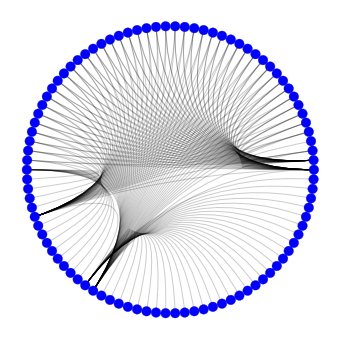

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


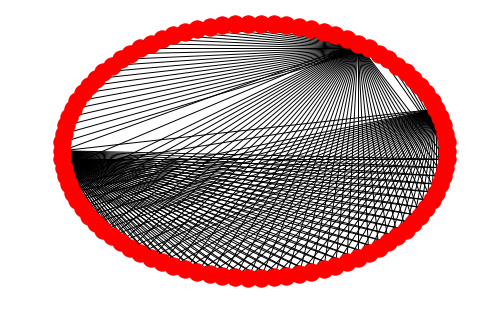

In [6]:
##  Example of visualizing a network as a CircosPlot

import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(twitter_g)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

############################
# using nx 
nx.draw_circular(twitter_g)
plt.show()

# 2. Important nodes : Degree centrality & Betweennes centrality

graph properties : Degree centrality & Betweennes centrality

Ways of identifying nodes that are important in a network. In doing so, you'll be introduced to more advanced concepts in network analysis as well as learn the basics of path-finding algorithms. The chapter concludes with a deep dive into the Twitter network dataset which will reinforce the concepts you've learned, such as degree centrality and betweenness centrality.

- Degree centrality 
- BFS Algorithm
- Betweennes centrality


## 2.1 : Degree centrality metric :

Degree centrality metric : evaluates the importance of a node 

Degree centrality = number of neighbors a node has / total number neighbors a node could could possibly have 
nx.neighbor(node): returns how many neighbors a node has
nx.degree_centrality(graph): retuns a dictionary with key as node and the score as a value.

nx.degree_centrality(graph)

### Degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. 


### Degree & Degree centrality :
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

In [7]:
#Compute number of neighbors for each node
def nodes_with_m_nbrs(G,m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
# six_nbrs = nodes_with_m_nbrs(twitter_g,1)
# print(six_nbrs)

In [8]:
## Degree distribution : the number of neighbors for each node 

#number of nodes in a graph:
# nodes = len(graph.nodes())

# Compute the degree of every node: degrees
# degrees = [len(list(graph.neighbors(n))) for n in graph.nodes()]

# # Print the degrees
# print(degrees)

In [9]:
# visualizing this degree distribution as well as the degree centrality distribution.

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
# deg_cent = nx.degree_centrality(T)

# # Plot a histogram of the degree centrality distribution of the graph.
# plt.figure()
# plt.hist(list(deg_cent.values()))
# plt.show()

# Compute the degree of every node: degrees
# degrees = [len(list(graph.neighbors(n))) for n in graph.nodes()]

# Plot a histogram of the degree distribution of the graph
# plt.figure()
# plt.hist(degrees)
# plt.show()

# # Plot a scatter plot of the centrality distribution and the degree distribution
# plt.figure()
# plt.scatter(degrees,list(deg_cent.values()))
# plt.show()

# print(' Given the similarities of their histograms, it should not surprise you to see a perfect correlation between the centrality distribution and the degree distribution.')

## 2.2: Graph Algorithm : 

#### path finding : breadth-first-search algorithm (BFS)

pathfinding is important in: 
- optimization problem. (the shortest transportation path bwt two nodes).
- modelling, ex: modelling the spread of a disease in an outbreak.



how to find if there is a path btw 2 nodes?
if there is a path btw two nodes how to find the shortest path?

* breadth-first-search algorithm (BFS)** :  was devolopped to find the shotest path in a maze. 
Pathfinding algorithms are important because they provide another way of assessing node importance.

how it work works? 
As the maze have many possible starting road: 
- we start by picking a road that is represented by node and ask how many neighbors it has.
- see if the final/ destination node is present in the first node's neighbors if not we continue on.
- going out a second degree of separation by passing to the second node and ask how many neighbors it has and see if the final distination is presend if not we continue. 
- going out a second degree of separation by passing to the second node and see if the final distination is one if its neighbors. 
- when we find the final destination, we stop and ignore the next degree of separation.

the algorithm loops over all the possible roads btw the pair of nodes and returns the shortest one.
in other words you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.



In [10]:
# Shortest Path I
# Define path_exists()

def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        
        #including the condition where the destination node is not present in the neighbors.
        else: 
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # code for the condition in which there is no path between two nodes.
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

## 2.3 : Betweenness centrality

#### All shortest path in a graph : every short path btw every pair of nodes. 

"All shortest path in a graph" are the set pf path in a graph such that each path is the shortest path btw a given pair of nodes, done for all pair of nodes.

#### Betweenness centrality : 

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

this metric captures a diffrent view of importance, it captures botteneck nodes in a graph rather than highly connected nodes 

Betweenness centrality = number of shortest path in a graph that passes through a node/ all possible shortest path

nx.betweenness_centrality(G) function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

In [11]:
# generating barbell graph

barbell = nx.barbell_graph(m1 = 5, m2=1)

# Betweenness centrality
print(nx.betweenness_centrality(barbell))

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.5333333333333333, 6: 0.5333333333333333, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 5: 0.5555555555555556}


In [12]:
### Degree centratily with betweenness centrality

# # Compute the betweenness centrality of T: bet_cen
# bet_cen = nx.betweenness_centrality(T)

# # Compute the degree centrality of T: deg_cen
# deg_cen = nx.degree_centrality(T)

# # Create a scatter plot of betweenness centrality and degree centrality
# plt.scatter(list(bet_cen.values()),list(deg_cen.values()))

# # Display the plot
# plt.show()

Exercice : Deep dive - Twitter network graph

**Parte 1** : degree centrality
You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

In [13]:
# part 1 : degree centrality:

# Define find_nodes_with_highest_deg_cent()

# def find_nodes_with_highest_deg_cent(G):

#     # Compute the degree centrality of G: deg_cent
#     deg_cent = nx.degree_centrality(G)

#     # Compute the maximum degree centrality: max_dc
#     max_dc = max(list(deg_cent.values()))

#     nodes = set()

#     # Iterate over the degree centrality dictionary
#     for k, v in deg_cent.items():

#         # Check if the current value has the maximum degree centrality
#         if v == max_dc:

#             # Add the current node to the set of nodes
#             nodes.add(k)

#     return nodes

# # Find the node(s) that has the highest degree centrality in T: top_dc
# top_dc = find_nodes_with_highest_deg_cent(graph)
# print(top_dc)

# # Write the assertion statement
# for node in top_dc:
#     assert nx.degree_centrality(graph)[node] == max(nx.degree_centrality(graph).values())

**Parte 2** : betweenness centrality

you're going to do an analogous deep dive on betweenness centrality! Just a few hints to help you along: remember that betweenness centrality is computed using nx.betweenness_centrality(G).

In [14]:
# # Define find_node_with_highest_bet_cent()
# def find_node_with_highest_bet_cent(G):

#     # Compute betweenness centrality: bet_cent
#     bet_cent = nx.betweenness_centrality(G)

#     # Compute maximum betweenness centrality: max_bc
#     max_bc = max(list(bet_cent.values()))

#     nodes = set()

#     # Iterate over the betweenness centrality dictionary
#     for k, v in bet_cent.items():

#         # Check if the current value has the maximum betweenness centrality
#         if v == max_bc:

#             # Add the current node to the set of nodes
#             nodes.add(k)

#     return nodes

# # Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
# top_bc = find_node_with_highest_bet_cent(G)

# # Write an assertion statement that checks that the node(s) is/are correctly identified.
# for node in top_bc:
#     assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

# 3. Structures :

This chapter is all about finding interesting structures within network data. You'll learn about essential concepts such as cliques, communities, and subgraphs, which will leverage all of the skills you acquired in Chapter 2. By the end of this chapter, you'll be ready to apply the concepts you've learned to a real-world case study.

## 3.1: Cliques & communities: 

### Cliques : 
- social cliques : pple who know everybody elese in the group to a pretty strong degree.
- clique in network : is a set of nodes that are completely connected by an egde to evey other node in the set.
- it's a completely connected graph.
- example of a simply connected clique is a triangle. 

#### Triangle applications in a social network 
- recommendation system (recommending a friend to form a clique).
If A knows B and knows C, B and C may be connected to form a closes triangle. 

### clique code to find all triangle thant a node might be involved in :

Identifying triangle relationships
Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

In [15]:
# clique code to find all triangle thant a node might be involved in :

from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle
    
    #extract all nodes involved in a triangle relationship with a given node

#### Finding nodes involved in triangles : 
NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [16]:
from itertools import combinations

# # Write a function that identifies all nodes in a triangle relationship with a given node.
# def nodes_in_triangle(G, n):
#     """
#     Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
#     """
#     triangle_nodes = set([n])

#     # Iterate over all possible triangle relationship combinations
#     for n1, n2 in combinations(G.neighbors(n),2):

#         # Check if n1 and n2 have an edge between them
#         if G.has_edge(n1, n2) :

#             # Add n1 to triangle_nodes
#             triangle_nodes.add(n1)

#             # Add n2 to triangle_nodes
#             triangle_nodes.add(n2)

#     return triangle_nodes

# # Write the assertion statement
# assert len(nodes_in_triangle(T, 1)) == 35

#print(' node 1 is in a triangle relationship with 35 other nodes.')

#### Finding open triangles :
Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

In [17]:
from itertools import combinations

# # Define node_in_open_triangle()
# def node_in_open_triangle(G, n):
#     """
#     Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
#     """
#     in_open_triangle = False

#     # Iterate over all possible triangle relationship combinations
#     for n1, n2 in combinations(G.neighbors(n), 2):

#         # Check if n1 and n2 do NOT have an edge between them
#         if not G.has_edge(n1,n2):

#             in_open_triangle = True

#             break

#     return in_open_triangle 

# # Compute the number of open triangles in T
# num_open_triangles = 0

# # Iterate over all the nodes in T
# for n in T.nodes():

#     # Check if the current node is in an open triangle
#     if node_in_open_triangle(T, n):

#         # Increment num_open_triangles
#         num_open_triangles += 1

# print(num_open_triangles)

### Maximal cliques :  communities : 

Maximal clique : a clique that can't be extended by adding another node in the graph
The application of Maximal clique is in **community finding** algorithms, as they are a fully connected subgraph withing a larger graph 

find_cliques() find all maximal cliques.

**communities are the union of maximal cliques that shares some number of memebers, but are also of some minimum size.**

Finding all maximal cliques of size "n"
Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: nx.find_cliques(G). Play around with the function by using it on T in the IPython Shell, and then try answering the exercise.

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


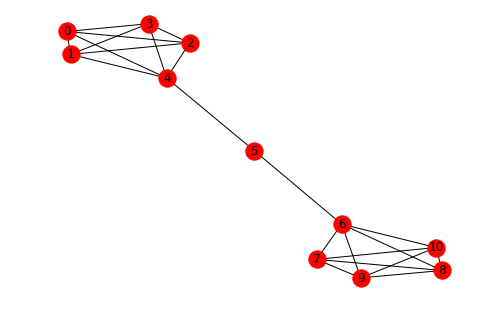

In [18]:
# generating barbell graph

barbell = nx.barbell_graph(m1 = 5, m2=1)
list(nx.find_cliques(barbell))

nx.draw(barbell, with_labels=True)
plt.show()

In [19]:
# # Define maximal_cliques()
# def maximal_cliques(G, size):
#     """
#     Finds all maximal cliques in graph `G` that are of size `size`.
#     """
#     mcs = []
#     for clique in nx.find_cliques(G):
#         if len(clique) == size:
#             mcs.append(clique)
#     return mcs

# # Check that there are 33 maximal cliques of size 3 in the graph T
# assert len(maximal_cliques(T, 3)) == 33

## 3.2: Subgraphs


Subgraphs : visualize portion of a large graph. 
- visualize particular path in a network.
- visualize particalar commumity or clique. 
- Degree of separation from a node : explore graph stucture around a node by going out a number of degree separation.

graph.subgraph(nodes) :slice out the nodes and egdes of interests and visualize them.



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[4, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


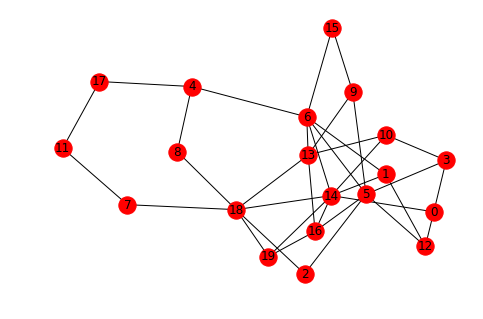

In [20]:
# example of subgraph : visualizing a node 8 and its neighbors.


erdos = nx.erdos_renyi_graph(n=20, p=0.2)
#p : the propability that an edge existes btw a given pain of the 20 nodes
print(erdos.nodes())

##################

# neighbor of node  8 :
neighbors = list(erdos.neighbors(8))
print(neighbors)
# append node 8 to the liste 
nodes_of_subgraph = neighbors.append(8)

# graph of choosen nodes to visualize:
graph_of_eight = erdos.subgraph(nodes_of_subgraph)

# edges that connect node 8 to its neighbor and edges that existes btw nodes
print(graph_of_eight.nodes())

#draw the subgraph:
nx.draw(graph_of_eight, with_labels=True)
plt.show()

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


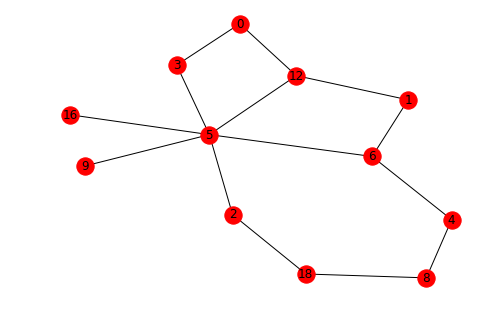

In [21]:
# function that draws choosen nodes and their neighbors:
nodes_of_interest = [5, 8, 12]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(erdos, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

Exercice : 

extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

In [22]:
# # Extract the nodes of interest: nodes

# reading graph file
# T = nx.read_adjlist('graph')

# nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# # Create the set of nodes: nodeset
# nodeset = set(nodes)

# # Iterate over nodes
# for n in nodes:

#     # Compute the neighbors of n: nbrs
#     nbrs = T.neighbors(n)

#     # Compute the union of nodeset and nbrs: nodeset
#     nodeset = nodeset.union(nbrs)

# # Compute the subgraph using nodeset: T_sub
# T_sub = T.subgraph(nodeset)

# # Draw T_sub to the screen
# nx.draw(T_sub)
# plt.show()

# 4. Study Case : 

in-depth case study of GitHub collaborator network data. This is a great example of real-world social network data, and your newly acquired skills will be fully tested.

Data : 

- Github : user collaboration Network.
- Nodes : users.
- Edges : two users are collaborators on at least on github repo. 

Goals : 
- Analyse the structure of the graph. 
- visualize the graph using nxviz. 
- build a simple recommendation system. (uses should colaborates together on a repo)

recall plotting the degree distribution steps :
- Calculating the degree centrality of G.
- Using the .values() method of G and converting it into a list.
- Passing the list of degree distributions to plt.hist().
- Displaying the histogram with plt.show().


In [23]:
# TRIED TO GET THE GRAPH DATA 

# nx.write_graphml(G, "githubnx.graphml")
# print(open('githubnx.graphml').read())


git = nx.read_gml('git2.gml')
node_data = git.nodes(data=True)
edges_data = git.edges(data=True)
# print(node_data)
# print(edges_data)

In [24]:
# PARTE 1 ## Characterizing the network : 

print('Number of nodes in Github network', len(git.nodes()))
print('Number of egdes in Github network',len(git.edges()))
print('FALSE Number of cliques in Github network',len(list(nx.find_cliques(git))))

# #node importances, by plotting the degree distribution of a network. 
# degree = list(nx.degree_centrality(git).values())
# plt.hist(degree)
# plt.show()

# # Plot the degree distribution of the GitHub collaboration network
# betweenness = list(nx.betweenness_centrality(git).values())
# plt.hist(betweenness)
# plt.show()




Number of nodes in Github network 63
Number of egdes in Github network 282
FALSE Number of cliques in Github network 19


Note to add :

**Connected componant subgraph concept** : a set of nodes connected to one another by some path in the subgraph and not connected to other nodes in the larger graph

In [25]:
# Example : Connected componant subgraph concept 

# graph_ex = nx.erdos_renyi_graph(n=100, p=0.03) 
# con_com = list(nx.connected_component_subgraphs(graph_ex))
# for graph in con_com:
#     print(len(graph.nodes()))
    
# print('the isolated 1 and 2 nodes cant be accessed from any of the 99 nodes in the graph, because no edge exist btw that nodes and other 99 nodes ')



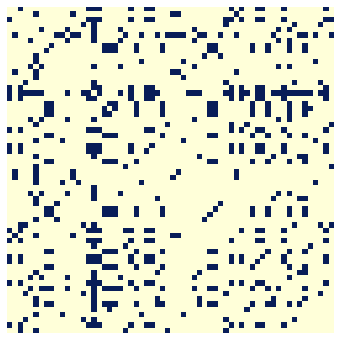

Recall that in a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.


In [39]:
### PARTE 2: Visualizing the network: using MatrixPlots, ArcPlots, and CircosPlots. Github data

# In a MatrixPlot, the matrix is the representation of the edges.
# Make a MatrixPlot visualization of the largest connected component subgraph, with authors grouped by their user group number.
# ##################

# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs using sorted() function
largest_ccs = sorted(nx.connected_component_subgraphs(git), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(largest_ccs,node_grouping= 'grouping')
# or h = MatrixPlot(largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

print("Recall that in a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.")

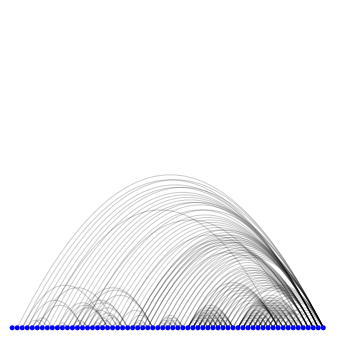

In [27]:
# ArcPlot of the GitHub collaboration network, with authors sorted by degree. 


# # Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in git.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
     git.node[n]['degree'] = nx.degree(git, n)

# Create the ArcPlot object: a
a = ArcPlot(graph=git , node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

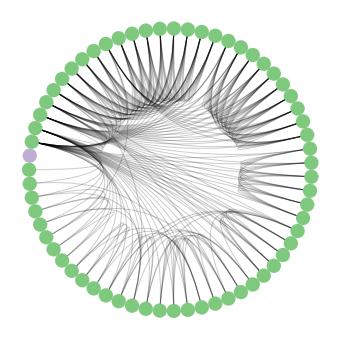

this CircosPlot provides a compact alternative to the ArcPlot. It is easy to see in this plot that most users belong to one group.


In [38]:
### CircosPlot of github network : 


# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in git.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    git.node[n]['degree'] = nx.degree(git,n)

# Create the CircosPlot object: c
c = CircosPlot(graph = git, node_order = 'degree', node_grouping= 'grouping', node_color ='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

print('this CircosPlot provides a compact alternative to the ArcPlot. It is easy to see in this plot that most users belong to one group.')

In [29]:
# PARTE 3 : cliques : 

##  finding cliques in G. Recall that cliques are "groups of nodes that are fully connected to one another", 
#while a maximal clique is a clique that cannot be extended by adding another node in the graph.

import networkx as nx
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(git)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

# there is some problem it should find 19, that why we cant plot down 

19


14


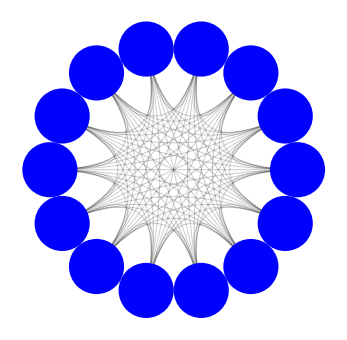

The subgraph consisting of the largest maximal clique has 14 users. It's time to move on towards building the recommendation system!


In [34]:
#  finding a particular maximal clique, and then plotting that clique :
#Find the author(s) that are part of the largest maximal clique, and plot the subgraph of that/one of those clique(s) using a CircosPlot.


# # Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(git), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = git.subgraph(largest_clique)
# it should be equal to  14 users not 171 
print(len(list(G_lc)))

# # Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

print("The subgraph consisting of the largest maximal clique has 14 users. It's time to move on towards building the recommendation system!")



 PARTE 4 : recommendation system 

recommendation system  streps : 
- find important github users based on their collaborative relationship using degree centrality 
- find larget communities of collaborators  using maximal cliques concept
- build a recommendation system for github users based on the concept of open triangles concept

step 1 : Finding important collaborators  

Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

In [31]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(git)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print('Print the most prolific collaborator',prolific_collaborators)

Print the most prolific collaborator ['u2022']


step 2 : Characterizing editing communities  

You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph G_lmc. Note that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. We must explicitly ask for a .copy() of the graph to obtain a mutatable version.

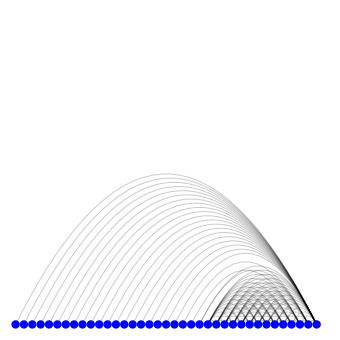

In [37]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(git), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = git.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    #Add nodes to G_lmc from the neighbors of G
    G_lmc.add_nodes_from(git.neighbors(node))
    # add edges to G_lmc between the current node and all its neighbors. by creating a list of tuples using 
    #consisting of the current node and each of its neighbors. 
    G_lmc.add_edges_from(zip([node]*len(list(git.neighbors(node))), git.neighbors(node)))

# Record each node's degree centrality scorein its node metadata.
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc,node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()


Step 3:  recommend collaborators who have not yet collaborated together.

Recommending co-editors who have yet to edit together
Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

In [36]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Compile a list of GitHub users that should be recommended to collaborate with one another
# Initialize the defaultdict: recommended, 
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in git.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(git.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge an edge between them, 
        if not git.has_edge(n1, n2):

            # a collaboration between these two nodes (users) should be recommended, so Increment recommended
             recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users that shoud be recommended to collaborate Using a list comprehension
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

print("You've identified pairs of users who should collaborate together, and in doing so, built your very own recommendation system")



[('u2022', 'u4159'), ('u655', 'u2022')]
You've identified pairs of users who should collaborate together, and in doing so, built your very own recommendation system
